<a href="https://colab.research.google.com/github/niksche/Diploma-thesis-Designing-communications-satellite-/blob/master/antenna-reflector-dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
M = fillMat(10) * -1


In [26]:


# def vectorfield(w, t, p):
#     """
#     Defines the differential equations for the system of differential equations.

#     Arguments:
#         w :  vector of the state variables:
#                   w = [x1,z1,x2,z2]
#         t :  time
#         p :  vector of the parameters:
#                   p = [m, mu, k, L]
#     """
#     x1, z1, x2, z2 = w

#     # could i just replcae this thing with an indexed version? 
#     m, mu, k, L = p
  
#     # Create f = (x1',y1',x2',y2'):
#     f = [z1,
#          (-mu * z1 -2*k*x1 + k*x2) / m,
#          z2,
#          (-mu * z2 + k * x1 - k * x2 + k*L)/m
#          ]
#     return f


    

In [28]:
# def vectorfield(w, t, p):
#     """
#     Defines the differential equations for the system of differential equations.

#     Arguments:
#         w :  vector of the state variables:
#                   w = [x1,z1,x2,z2]
#         t :  time
#         p :  vector of the parameters:
#                   p = [m, mu, k, L]
#     """
#     # x1, z1, x2, z2 = w

#     # could i just replcae this thing with an indexed version? 
#     m, mu, k, L = p
  
#     # Create f = (x1',y1',x2',y2'):
#     f = [w[1],
#          (-mu * w[1] -2*k*w[0] + k*w[2]) / m,
#          w[3],
#          (-mu * w[3] + k * w[0] - k * w[2] + k*L)/m
#          ]
#     return f

In [35]:
def vectorfield2(w, t, p, M):
    # M = [[-2.,  1.],
    #    [ 1., -1.]]

    # xes = [w[0], w[2]]
    xes = []
    for id, x in enumerate(w):
      if (id % 2) == 0: 
        xes.append(x)
    """
    Defines the differential equations for the system of differential equations.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,z1,x2,z2]
        t :  time
        p :  vector of the parameters:
                  p = [m, mu, k, L]
    """
    # x1, z1, x2, z2 = w

    # could i just replcae this thing with an indexed version? 
    m, mu, k, L = p
    n = len(w)

    resV = []

    for id, el in enumerate(range(n)):
      # calculate for the last one is kinda tricky: 
      if (id % 2) == 0:
        # print("w" + str(id + 1))
        resV.append(w[id+1])
      else:
        i = (id -1)/ 2 if ((id -1)/ 2 > 0) else 0
        # coef = 2 * W0 / (m * L ** 2)
        # print(M[int(i)], xes)
#       here we have x * m[i]
        # print("K is ", k)
        # print("M is ", M[int(i)], "xes is", xes)
        # M1 = M * -1
        isLast = 0
        if (id == (n-1)):
          isLast = k*L
        a = np.matmul(M[int(i)], xes)
        # print("-mu * w[id] + k * np.matmul(M[int(i)], xes)", "id = ", id, "i = ", i, "M[int(i) is ", M[int(i)]) 
        resV.append( (-mu * w[id] + k * a + isLast)/m)
    f1 = resV
    # Create f = (x1',y1',x2',y2'):
    # f = [w[1],
    #      (-mu * w[1] -2*k*w[0] + k*w[2]) / m,
    #      w[3],
    #      (-mu * w[3] + k * w[0] - k * w[2] + k*L)/m
    #      ]
    return f1

In [31]:
import numpy as np

def coefficient(i, j):
  c = 0;
  l = abs(i - j)
  if l == 0: 
    c = 2
  if l == 1: 
    c = (-1);
  return c;

def fillMat(shapeDimentions):
  a = np.zeros(shape=(shapeDimentions,shapeDimentions))
  for idx, x in np.ndenumerate(a):
    for idy, y in np.ndenumerate(x):
      a[idx[0], idx[1]] = coefficient(idx[0], idx[1])

  a[a.shape[0] -1][ a.shape[1] -1] = 1
  return a


In [81]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m = 0.5


# Natural lengths
L = 1


# Spring coefficients
k = 1

W0 = 1

k = 2 * W0 / L**2

# Friction coefficients
mu = 0.2
# Initial conditions
# x1 and x2 are the initial displacements; z1 and z2 are the initial velocities
x1 = 0.0
z1 = 0.0
x2 = 0.2
z2 = 0.0


# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 1000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, mu, k, L]
# w0 = [x1, z1, x2, z2]

w0 = []
# print(max(xes) if len(xes) > 0 else 0)
n = 10
for i in range(n):
  xi = max(w0) + 0.1 if len(w0) > 0 else 0
  w0.append(xi)
  w0.append(0)

# Call the ODE solver.
wsol = odeint(vectorfield2, w0, t, args=(p,M),
              atol=abserr, rtol=relerr)

with open('reflector-dynamics.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, end=" ", file=f)
        for wi in w1: 
          print(wi, end=" ",file=f)
        print("",file=f)
        # print(t1, w1[0], w1[1], w1[2], w1[3], w1[4], w1[5], w1[6], w1[7], w1[8], w1[9])
        # print(t1, w1[0], w1[1], w1[2], w1[3], w1[4], w1[5], w1[6], w1[7], w1[8], w1[9], file=f)

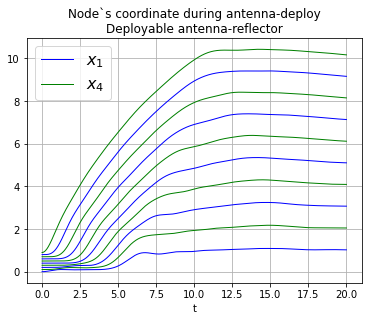

In [82]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# t, x1, z1, x2, z2, *zres = loadtxt('reflector-dynamics.dat', unpack=True)
t, *zres = loadtxt('reflector-dynamics.dat', unpack=True)

xes = []
zes = []


for id, el in enumerate(zres):
  if (id % 2 ) == 0: 
    xes.append(el)
  else: 
    zes.append(el)
    
# x1 = xes[0]
# z1 = zes[0]
# x2 = xes[1]
# z2 = zes[1]

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1

for id, x in enumerate(xes):
  color = 'b' if (id % 2) == 0 else 'g'
  plt.plot(t, x, color, linewidth=lw)


plt.legend((r'$x_1$', r'$x_4$'), prop=FontProperties(size=16))
plt.title('Node`s coordinate during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_coordinates.png', dpi=100)




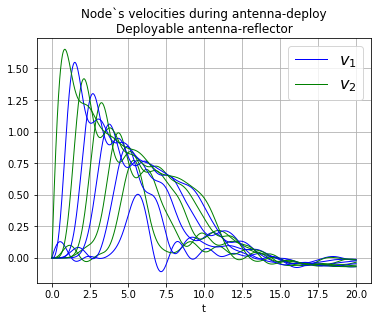

In [83]:

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
# plt.hold(True)
lw = 1


for id, z in enumerate(zes):
  color = 'b' if (id % 2) == 0 else 'g'
  plt.plot(t, z, color, linewidth=lw)


# plt.plot(t, zes[1], 'g', linewidth=lw)

plt.legend((r'$v_1$', r'$v_2$'), prop=FontProperties(size=16))
plt.title('Node`s velocities during antenna-deploy\nDeployable antenna-reflector')
plt.savefig('reflector\`s_velocities.png', dpi=100)


In [51]:
import matplotlib.animation as animation
# Plot the solution that was generated
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from matplotlib import rc
rc('animation', html='jshtml')
# rc('animation', embed_limit= 2 ** 128 )

# rc('animation', html='html5')
# rcParams['animation.html'] = 'jshtml'
# rcParams["animation.embed_limit"] = 2 * 128




In [ ]:
print(zres[4])


In [86]:
def middle(left, right):
    c = L / 2 
    halfOfLength = (right[0]-left[0])/2 if ((right[0]-left[0])/2 < c) else c #  a
    xMiddle = halfOfLength + left[0]
    yMiddle = (c ** 2 - halfOfLength ** 2 ) ** 0.5
    return [xMiddle, -yMiddle]



In [97]:
def initialPlot(xes, amount):
    xNodes = [0]

    yNodes = [0]

    middleInitial = middle([0,0], [xes[0][0], 0])
    xNodes.append(middleInitial[0])
    yNodes.append(middleInitial[1])

    nra = amount

    for i in range(nra):
      middleAction = middle([xes[i][0],0],[xes[i+1][0],0])
      xNodes.append(xes[i][0])
      xNodes.append(middleAction[0])
      yNodes.append(0)
      yNodes.append(middleAction[1])

    xNodes.append(xes[nra][0])
    yNodes.append(0)

    return [xNodes, yNodes]

def anime_0(xes, amount, idx):
    xNodes = [0]

    yNodes = [0]

    middleInitial = middle([0,0], [xes[0][idx], 0])
    xNodes.append(middleInitial[0])
    yNodes.append(middleInitial[1])

    nra = amount

    for i in range(nra):
      middleAction = middle([xes[i][idx],0],[xes[i+1][idx],0])
      xNodes.append(xes[i][idx])
      xNodes.append(middleAction[0])
      yNodes.append(0)
      yNodes.append(middleAction[1])

    xNodes.append(xes[nra][idx])
    yNodes.append(0)

    return [xNodes, yNodes]

def anime_2(xes, amount, idx):
    xNodes = [0]

    yNodes = [0]

    middleInitial = middle([0,0], [xes[0][idx], 0])
    xNodes.append(middleInitial[0])
    yNodes.append(middleInitial[1])

    nra = amount

    for i in range(nra):
      middleAction = middle([xes[i][idx],0],[xes[i+1][idx],0])
      xNodes.append(xes[i][idx])
      xNodes.append(middleAction[0])
      yNodes.append(0)
      yNodes.append(middleAction[1])

    xNodes.append(xes[nra][idx])
    yNodes.append(0)

    yNodes = [yx - 1 for yx in yNodes]

    return [xNodes, yNodes]


In [ ]:
nodesAmount = 8
# animation.rcParams["animation.embed_limit"] = 2 ** 128

a = initialPlot(xes, nodesAmount)

lowerA = [ix -1 for ix in a[1] ]

b = a

b[1] = lowerA

# figure(figsize=(8, 6), dpi=80)

fig = plt.figure(figsize=(20, 13))
ax = plt.axes(xlim=(-1, 10), ylim=(-5, 6))

innerY = []
for i, el in enumerate(a[1]):
  if (i % 2) == 0: 
    innerY.append(a[1][i])
  else: 
    innerY.append(b[1][i])

InnerLine = [a[0], innerY]

line, = ax.plot( a[0], a[1] ,'bo-')
line2, = ax.plot( b[0], b[1] ,'bo-')
line3, = ax.plot(InnerLine[0], InnerLine[1], 'bo-')

def middle(left, right):
    c = L / 2 
    halfOfLength = (right[0]-left[0])/2 if ((right[0]-left[0])/2 < c) else c #  a
    xMiddle = halfOfLength + left[0]
    yMiddle = (c ** 2 - halfOfLength ** 2 ) ** 0.5
    # middleY = 
    return [xMiddle, -yMiddle]

def init():
    line.set_data( a[0], a[1])
    line2.set_data(a[0], a[1])
    line3.set_data(InnerLine[0], InnerLine[1])
    return line, line2, line3

init()

def anime(i): 
  return anime_0(xes, nodesAmount, i)
  
def anime2(i): 
  return anime_2(xes, nodesAmount, i)

def animate(i):

    gg = anime(i)
    gg2 = anime2(i)

    innerY = []
    for i, el in enumerate(gg[1]):
      if (i % 2) == 0: 
        innerY.append(gg[1][i])
      else: 
        innerY.append(gg2[1][i])

    InnerLine = [gg[0], innerY]


    line.set_data(gg[0], gg[1])
    line2.set_data(gg2[0], gg2[1])
    line3.set_data(InnerLine[0], InnerLine[1])

    return line, line2, line3

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=900, interval=1, blit=True)


anim
